In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.cluster import AffinityPropagation, SpectralClustering
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis

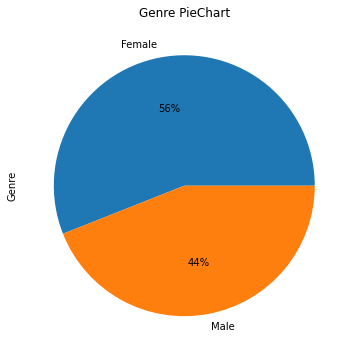

In [8]:
df.Genre.value_counts().plot(kind='pie', autopct='%1.0f%%', title="Genre PieChart", figsize=(8,6))
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

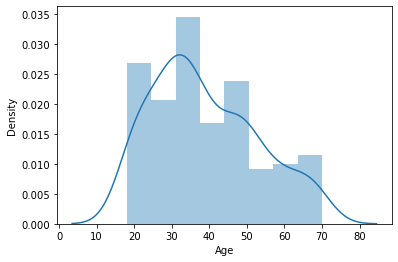

In [9]:
sns.distplot(df['Age'])

<AxesSubplot:>

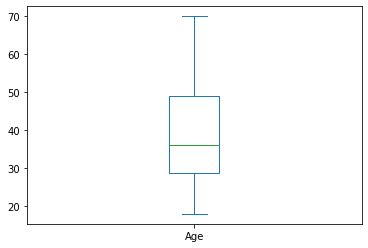

In [10]:
df['Age'].plot(kind='box')

<AxesSubplot:>

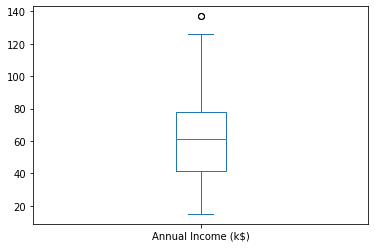

In [11]:
df['Annual Income (k$)'].plot(kind='box')

<AxesSubplot:>

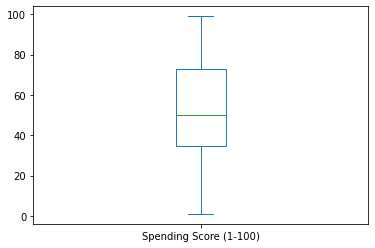

In [12]:
df['Spending Score (1-100)'].plot(kind='box')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

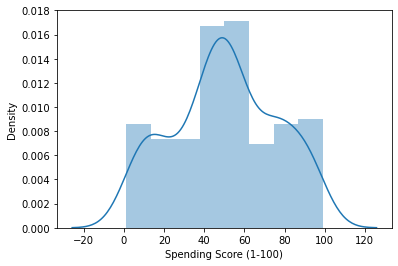

In [13]:
sns.distplot(df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

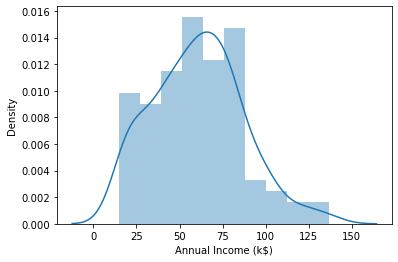

In [14]:
sns.distplot(df['Annual Income (k$)'])

In [15]:
df['Genre'] = df['Genre'].apply(lambda x: 1 if 'Male' in x else 0)

In [16]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [17]:
df.drop('CustomerID',axis=1,inplace=True)

In [18]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

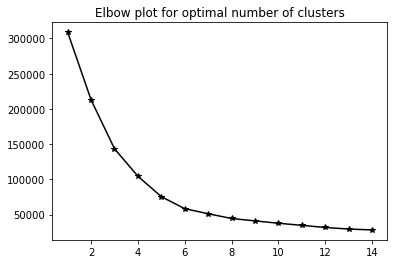

In [19]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(df)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

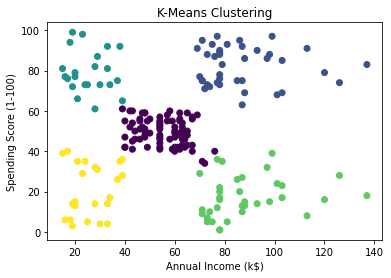

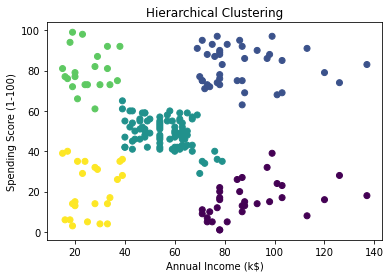

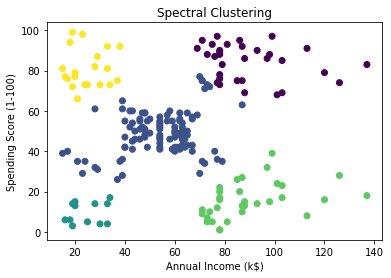

In [20]:
# Extract the features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_cluster.fit_predict(scaled_features)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=5)
spectral_labels = spectral.fit_predict(scaled_features)

# Visualize the clusters
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=kmeans_labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

# Visualize the clusters
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=agg_labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering')
plt.show()

# Visualize the clusters
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=spectral_labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spectral Clustering')
plt.show()


### KMeans Clustering with 5 clusters

In [21]:
k_means = KMeans(n_clusters=5)
k_means.fit(df)

KMeans(n_clusters=5)

In [22]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4])

In [23]:
centers = k_means.cluster_centers_

centers

array([[ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])

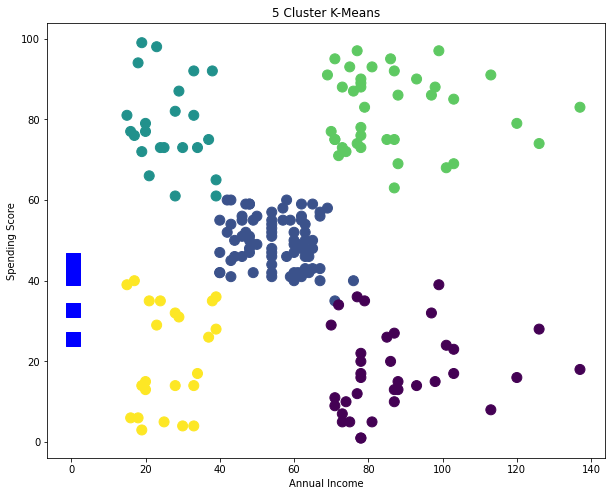

In [24]:
plt.figure(figsize=(10, 8))

plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

In [25]:
X = df.iloc[:,:].values
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [26]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=42)

In [27]:
cluster_values = kmeans.fit_predict(X)

In [28]:
cluster_values.shape

(200,)

In [29]:
df['Target'] = cluster_values
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


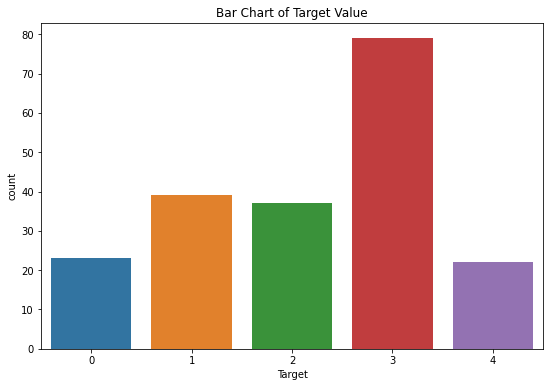

In [30]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.Target)
plt.title("Bar Chart of Target Value")
plt.show()

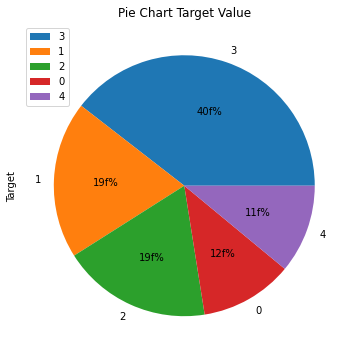

In [31]:
df.Target.value_counts().plot(kind='pie', autopct="%1.0ff%%",figsize=(9,6), title="Pie Chart Target Value", legend=True)
plt.show()

In [32]:
# Split the data into features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

In [33]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [34]:
y

0      0
1      4
2      0
3      4
4      0
      ..
195    1
196    2
197    1
198    2
199    1
Name: Target, Length: 200, dtype: int32

In [35]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Create a dictionary to store the model names and accuracy scores
results = {'Model': [], 'Accuracy': [],'Classification Report': [], 'Confusion Matrix': []}

# Define a list of models to iterate over
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]

# Iterate over each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Generate confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Store the results in the dictionary
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Classification Report'].append(report)
    results['Confusion Matrix'].append(matrix)

# Create a pandas DataFrame from the results
df = pd.DataFrame(results)

# Print the DataFrame
df

,Model,Accuracy,Classification Report,Confusion Matrix
0,Logistic Regression,0.900,precision recall f1-score ...,"[[1, 0, 1, 1, 0], [0, 6, 1, 1, 0], [0, 0, 7, 0..."
1,Decision Tree,1.000,precision recall f1-score ...,"[[3, 0, 0, 0, 0], [0, 8, 0, 0, 0], [0, 0, 7, 0..."
2,Random Forest,1.000,precision recall f1-score ...,"[[3, 0, 0, 0, 0], [0, 8, 0, 0, 0], [0, 0, 7, 0..."
3,Support Vector Machine,1.000,precision recall f1-score ...,"[[3, 0, 0, 0, 0], [0, 8, 0, 0, 0], [0, 0, 7, 0..."
4,Gradient Boosting,0.975,precision recall f1-score ...,"[[3, 0, 0, 0, 0], [0, 7, 0, 1, 0], [0, 0, 7, 0..."
5,K-Nearest Neighbors,1.000,precision recall f1-score ...,"[[3, 0, 0, 0, 0], [0, 8, 0, 0, 0], [0, 0, 7, 0..."
6,Naive Bayes,1.000,precision recall f1-score ...,"[[3, 0, 0, 0, 0], [0, 8, 0, 0, 0], [0, 0, 7, 0..."


In [37]:
# Print classification report and confusion matrix for each model
for i in range(len(models)):
    print(f"\nModel: {models[i][0]}\n")
    print(df['Classification Report'][i])
    print("Confusion Matrix:")
    print(df['Confusion Matrix'][i])
    print("---------------------------------------------------")


Model: Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      0.75      0.86         8
           2       0.78      1.00      0.88         7
           3       0.89      1.00      0.94        17
           4       1.00      1.00      1.00         5

    accuracy                           0.90        40
   macro avg       0.93      0.82      0.84        40
weighted avg       0.92      0.90      0.89        40

Confusion Matrix:
[[ 1  0  1  1  0]
 [ 0  6  1  1  0]
 [ 0  0  7  0  0]
 [ 0  0  0 17  0]
 [ 0  0  0  0  5]]
---------------------------------------------------

Model: Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        17
           4       1.00    